<a href="https://colab.research.google.com/github/nicolled1/BI/blob/main/BERROSPI_NICOLLET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Business Intelligence - Laboratorio 01 25-03-24  
by M.Sc. Emerson D. Norabuena
Caso: análisis exploratorio del Crédito Bancario BCP - UNMSM

## Acerca del conjunto de datos

Contexto

Este es el conjunto de datos utilizado en la sección "ANN (Artificial Neural Networks)" del curso de Udemy de Kirill Eremenko (Científico de datos y experto en sistemas Forex) y Hadelin de Ponteves (Científico de datos), llamado Deep Learning AZ™: Hands-On Artificial Redes neuronales . El conjunto de datos es muy útil para los principiantes en el aprendizaje automático y es un campo de juego sencillo donde comparar varias técnicas/habilidades.

Se puede descargar gratuitamente aquí: https://www.superdatascience.com/deep-learning/

Objetivo de estudio:
Un banco está investigando una tasa muy alta de clientes que abandonan el banco. Aquí hay un conjunto de datos de 10.000 registros para investigar y predecir cuáles de los clientes tienen más probabilidades de abandonar el banco pronto.

Los atributos de esta dataset es:

1. RowNumber
1. CustomerId
1. Surname
1. CreditScore
1. Geography
1. Gender
1. Age
1. Tenure
1. Balance
1. NumOfProducts
1. HasCrCard
1. IsActiveMember
1. EstimatedSalary
1. Exited

Conten:
1. Load and Check Data
1. Data Visualization
1. Feature Engineering
1. Modeling Train - Test Split
1. Standardization

In [20]:
 !pip install tensorflow

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras


1. Load and Check Data

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/nicolled1/BI./main/ENPOVE2022_V_700%20Discriminaci%C3%B3n.csv', sep=',', encoding='unicode_escape').astype(str)
#data=pd.read_csv("C:/Users/Nor4buena/Documents/Notebooks/Churn_Modelling.csv")

<ipython-input-22-69de2d3e3447>:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/nicolled1/BI./main/ENPOVE2022_V_700%20Discriminaci%C3%B3n.csv', sep=',', encoding='unicode_escape').astype(str)


In [23]:
data.head()

,ï»¿CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P709_4,P709_5,P709_6,P709_7,P709_8,P709_9,P709_10,P709_11,P709_12,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,10.Esparcimiento y diversiÃ³n,0,0,9.21107902336571
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,0,0,0,9.21107902336571
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,6.ArtÃ­culos no alimentarios (ropa/cuidado per...,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,9.21107902336571
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,0,0,0,0,12.SUS NECESIDADES YA ESTÃN CUBIERTAS,9.21107902336571
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,0,0,0,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,18.4221580467314


In [24]:
data.shape

(10242, 81)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿CCDD       10242 non-null  object
 1   DEPARTAMENTO  10242 non-null  object
 2   CCPP          10242 non-null  object
 3   PROVINCIA     10242 non-null  object
 4   CCDI          10242 non-null  object
 5   DISTRITO      10242 non-null  object
 6   CIUDAD        10242 non-null  object
 7   CONGLOMERADO  10242 non-null  object
 8   NSELV         10242 non-null  object
 9   VIVIENDA      10242 non-null  object
 10  THOGAR        10242 non-null  object
 11  NHOGAR        10242 non-null  object
 12  ESTRATO       10242 non-null  object
 13  VRESFIN       10242 non-null  object
 14  RESFIN        10242 non-null  object
 15  P15           10242 non-null  object
 16  P15_N         10242 non-null  object
 17  P200_N        10242 non-null  object
 18  INF_700       10242 non-null  object
 19  P701

In [26]:
data.head().describe().T

,count,unique,top,freq
ï»¿CCDD,5,1,24,5
DEPARTAMENTO,5,1,TUMBES,5
CCPP,5,1,1,5
PROVINCIA,5,1,TUMBES,5
CCDI,5,1,1,5
...,...,...,...,...
P709_9,5,2,0,3
P709_10,5,2,10.Esparcimiento y diversiÃ³n,3
P709_11,5,1,0,5
P709_12,5,2,0,4


In [27]:
data["PROVINCIA"].nunique()

9

In [28]:
data["CCPP"].nunique()

2

In [29]:
data.isnull().sum()

ï»¿CCDD         0
DEPARTAMENTO    0
CCPP            0
PROVINCIA       0
CCDI            0
               ..
P709_9          0
P709_10         0
P709_11         0
P709_12         0
factorfinal     0
Length: 81, dtype: int64

In [30]:
data.head()

,ï»¿CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P709_4,P709_5,P709_6,P709_7,P709_8,P709_9,P709_10,P709_11,P709_12,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,10.Esparcimiento y diversiÃ³n,0,0,9.21107902336571
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,0,0,0,9.21107902336571
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,6.ArtÃ­culos no alimentarios (ropa/cuidado per...,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,9.21107902336571
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,0,0,0,0,12.SUS NECESIDADES YA ESTÃN CUBIERTAS,9.21107902336571
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,0,0,0,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,18.4221580467314


2. Data Visualization

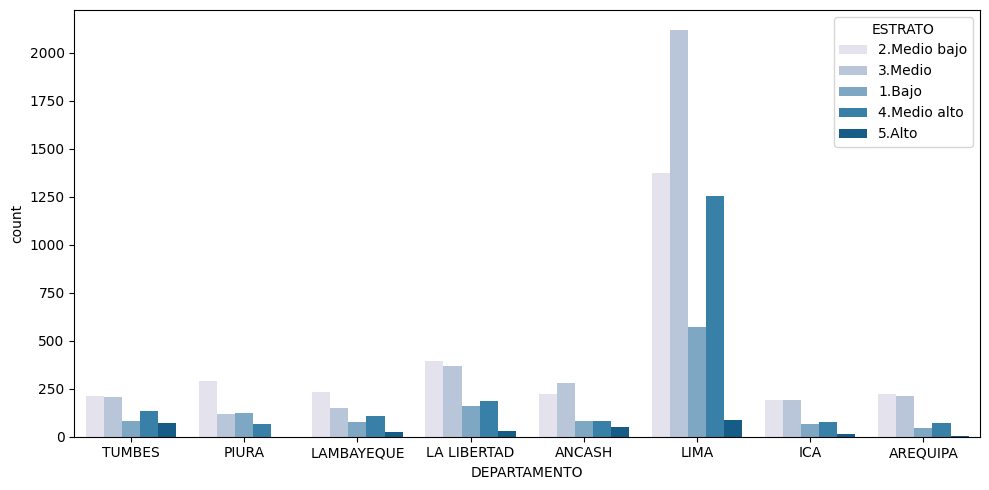

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data, x="DEPARTAMENTO", hue="ESTRATO", palette="PuBu")
plt.legend(title="ESTRATO")
plt.tight_layout()
plt.show()



<ipython-input-32-fb6d86ba33e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="THOGAR", palette="PuBu")


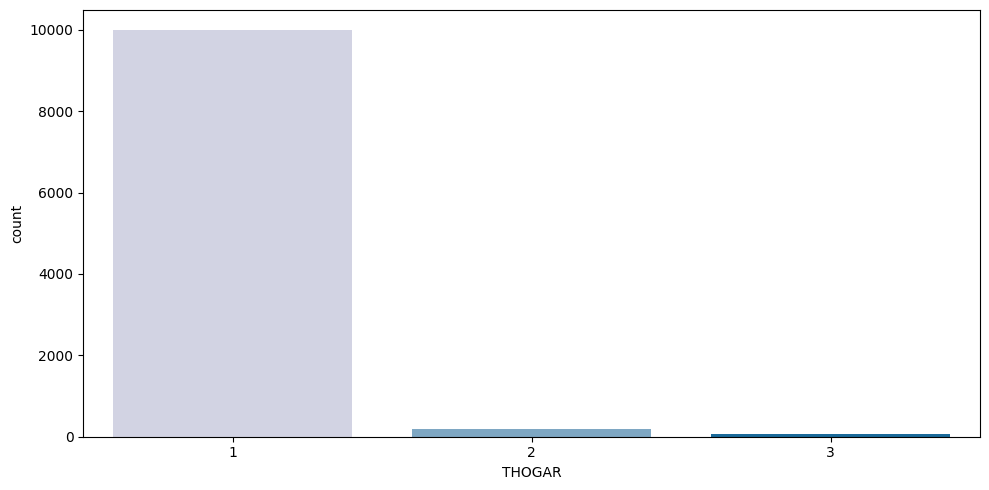

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(data, x="THOGAR", palette="PuBu")
plt.tight_layout()
plt.show()



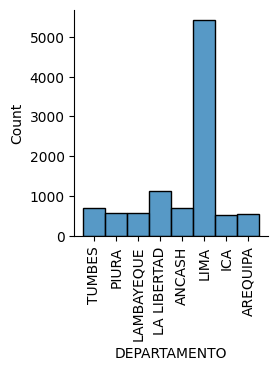

In [33]:

variable_categorica = 'DEPARTAMENTO'

if variable_categorica in data.columns:
    age = sns.FacetGrid(data)
    age.map(sns.histplot, variable_categorica)
    plt.xticks(rotation=90)
    plt.show()
else:
    print(f"La variable '{variable_categorica}' no está presente en tus datos.")

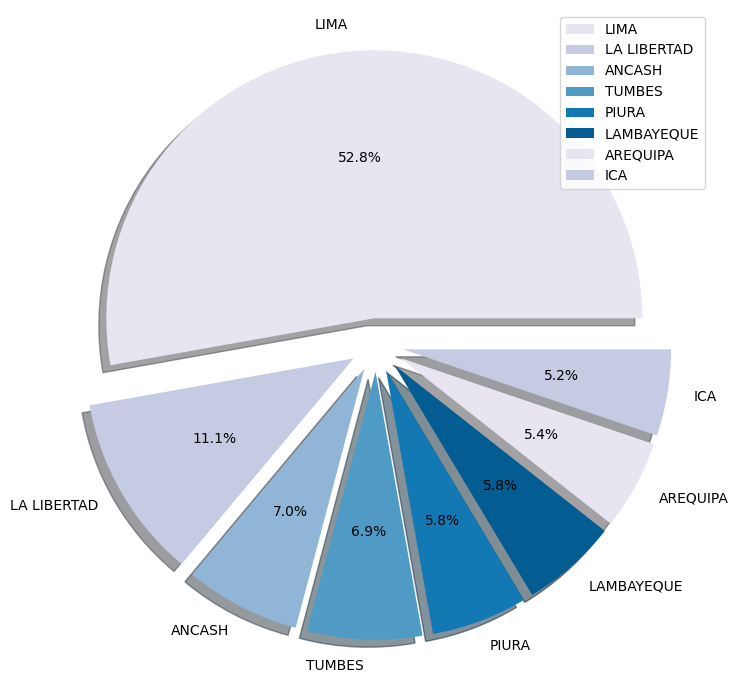

In [36]:

plt.figure(figsize=(10,7))
x_axis = data["DEPARTAMENTO"].value_counts()
figlabels = data["DEPARTAMENTO"].value_counts().index
explode_length = len(figlabels)
explode = [0.1] * explode_length
plt.pie(x=x_axis, labels=figlabels, autopct="%0.1f%%", explode=explode, shadow=True, colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()


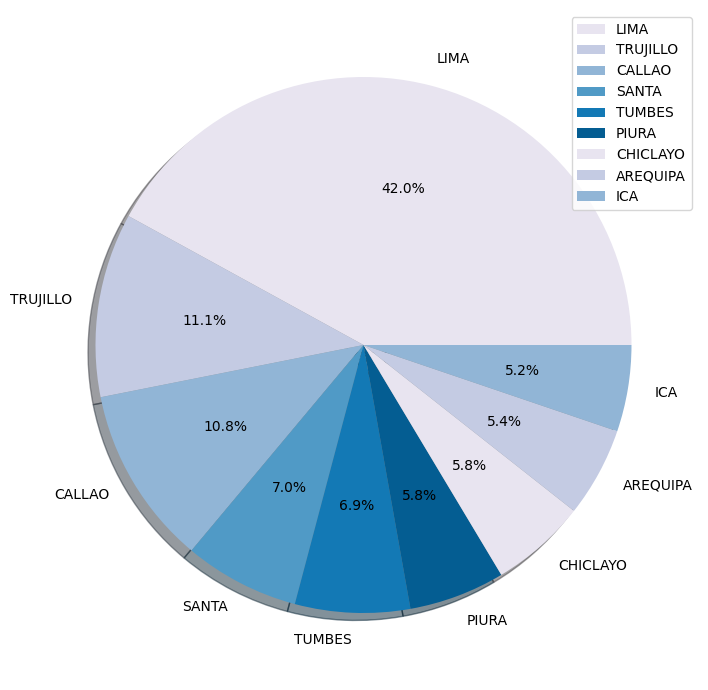

In [37]:
variable = "PROVINCIA"

explode = [0] * len(data[variable].value_counts())

plt.figure(figsize=(10, 7))

x_axis = data[variable].value_counts()
figlabels = data[variable].value_counts().index

plt.pie(x=x_axis, labels=figlabels, autopct="%0.1f%%", explode=explode, shadow=True, colors=sns.color_palette("PuBu"))

plt.legend()

plt.tight_layout()

plt.show()

Normalización de datos

In [38]:
data["DEPARTAMENTO"]=LabelEncoder().fit_transform(data["DEPARTAMENTO"])
data["PROVINCIA"]=LabelEncoder().fit_transform(data["PROVINCIA"])

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/nicolled1/BI./main/ENPOVE2022_V_700%20Discriminaci%C3%B3n.csv', sep=',', encoding='unicode_escape')
#data=pd.read_csv("C:/Users/Nor4buena/Documents/Notebooks/Churn_Modelling.csv")

<ipython-input-39-ad92334eb11a>:1: DtypeWarning: Columns (60) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/nicolled1/BI./main/ENPOVE2022_V_700%20Discriminaci%C3%B3n.csv', sep=',', encoding='unicode_escape')


Codificador de datos

In [40]:
lb=LabelEncoder()
data['DEPARTAMENTO']=lb.fit_transform(data['DEPARTAMENTO'])

In [41]:
data.head()

,ï»¿CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P709_4,P709_5,P709_6,P709_7,P709_8,P709_9,P709_10,P709_11,P709_12,factorfinal
0,24,7,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,10.Esparcimiento y diversiÃ³n,0,0,9.211079
1,24,7,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,0,0,0,9.ReunificaciÃ³n familiar,0,0,0,9.211079
2,24,7,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,4.GeneraciÃ³n de ingresos/empleo,0,6.ArtÃ­culos no alimentarios (ropa/cuidado per...,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,9.211079
3,24,7,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,0,0,0,0,12.SUS NECESIDADES YA ESTÃN CUBIERTAS,9.211079
4,24,7,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,0,0,0,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,18.422158


In [42]:
#data = pd.get_dummies(data, columns= ["DEPARTAMENTO"])
#data = pd.get_dummies(data, columns= ["PROVINCIA"])
#data = pd.get_dummies(data, columns= ["DISTRITO"])
#data.head()

In [43]:
print("Max : ", data['P15_N'].max())
print("Min : ", data['P15_N'].min())

Max :  15
Min :  1


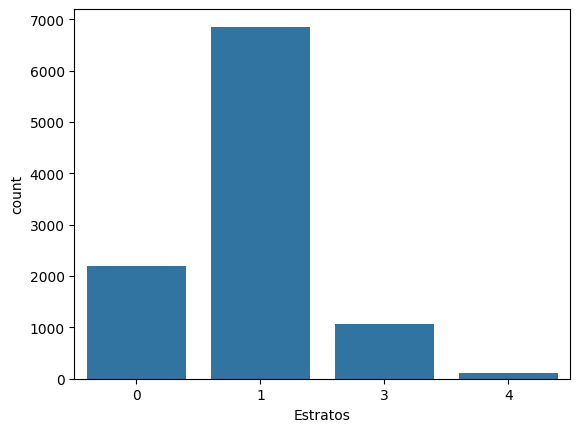

In [44]:
age_cat = [0 if i < 3 else 1 if i < 7  else 2 if i < 7 else 3 if i < 11 else 4 for i in data["P15_N"]]
data["Estratos"] = age_cat

sns.countplot(x = "Estratos", data = data)
plt.show()

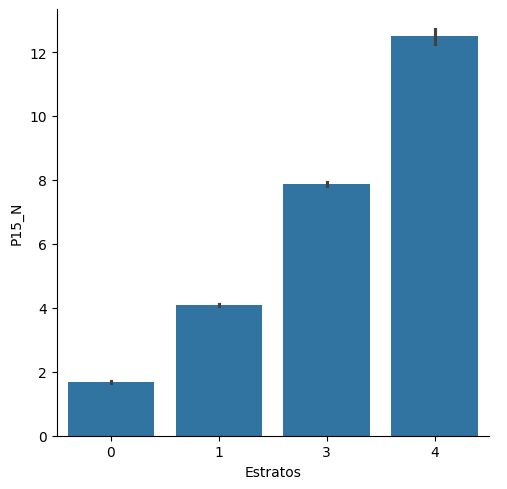

In [45]:
g = sns.catplot(x = "Estratos", y = "P15_N", data = data, kind = "bar")
g.set_ylabels("P15_N")
plt.show()

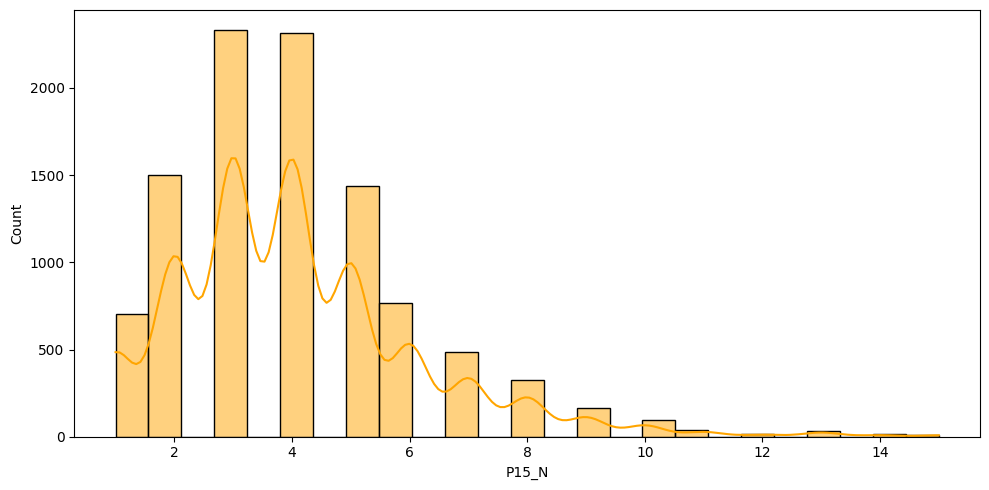

In [46]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data["P15_N"],bins=25,kde=True,color="orange",ax=ax)
plt.tight_layout()
plt.show()

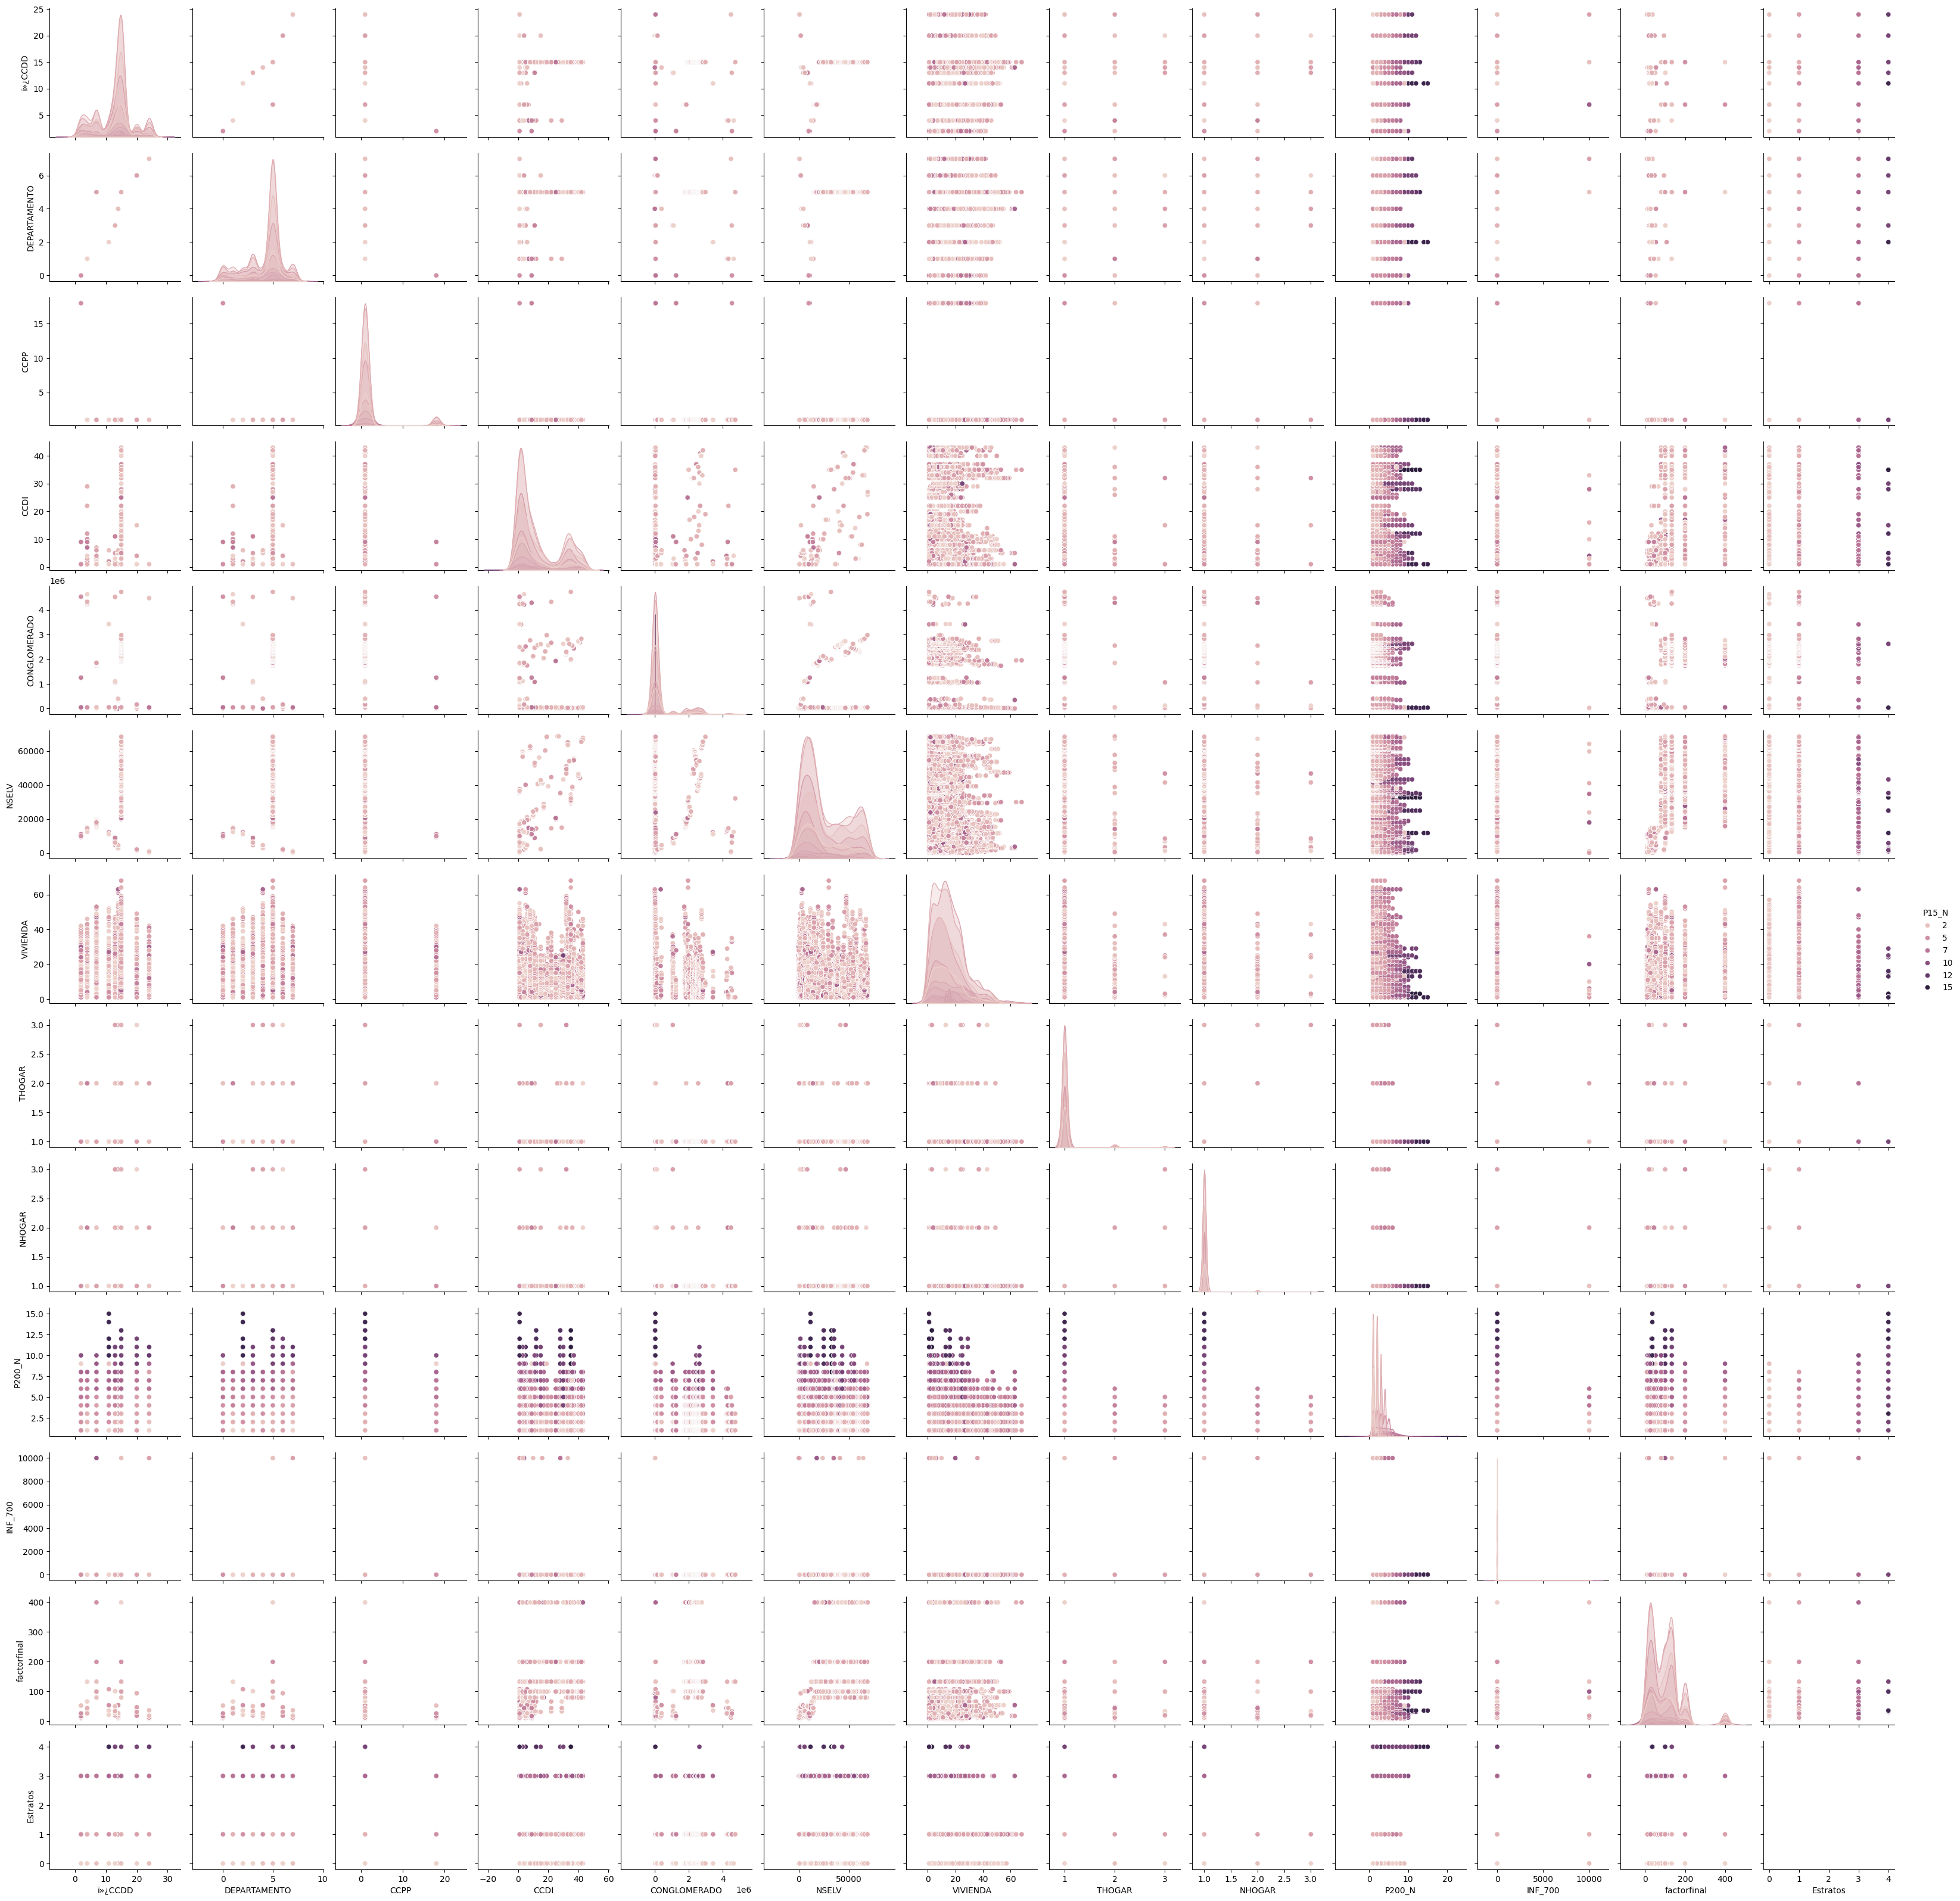

In [47]:
sns.pairplot(data, hue="P15_N")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.8% of the points cannot be place

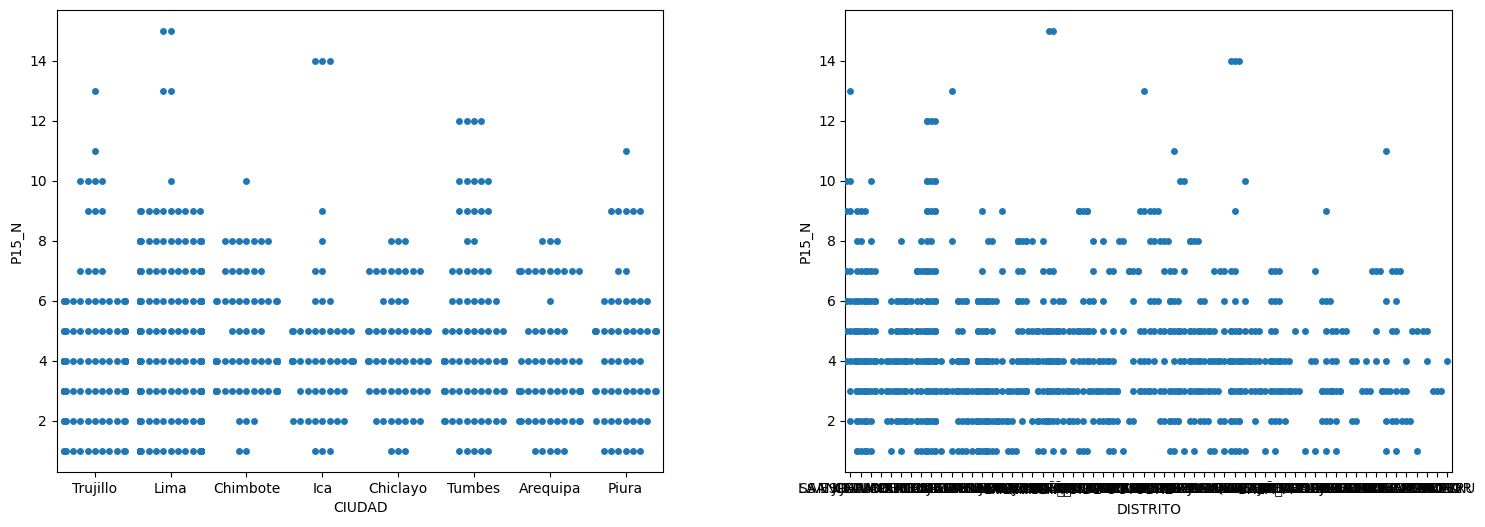

In [48]:
data_sample = data.sample(frac=0.1, random_state=42)

_, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.swarmplot(x="CIUDAD", y="P15_N", data=data_sample, ax=ax[0])
sns.swarmplot(x="DISTRITO", y="P15_N", data=data_sample, ax=ax[1])
plt.subplots_adjust(wspace=0.3)
plt.show()

In [49]:
encoder = LabelEncoder()
data["DEPARTAMENTO"] = encoder.fit_transform(data["DEPARTAMENTO"])
data["PROVINCIA"] = encoder.fit_transform(data["PROVINCIA"])

<Axes: >

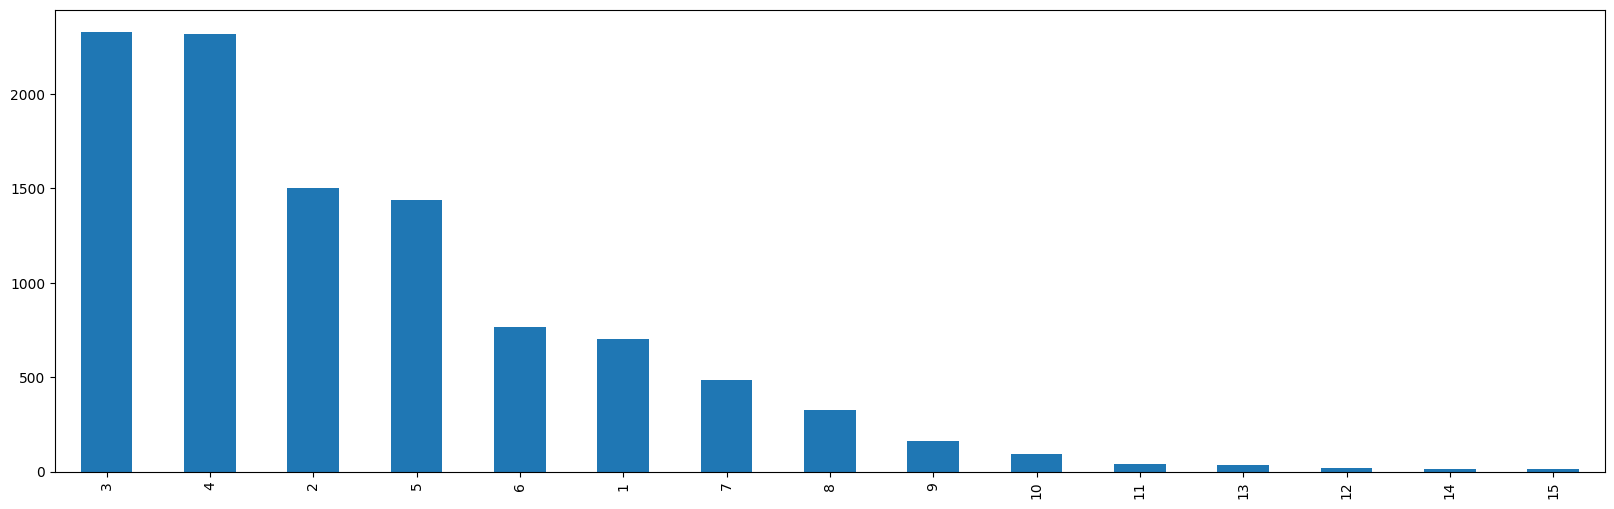

In [50]:
data["P15_N"].value_counts().plot.bar(figsize=(20,6))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

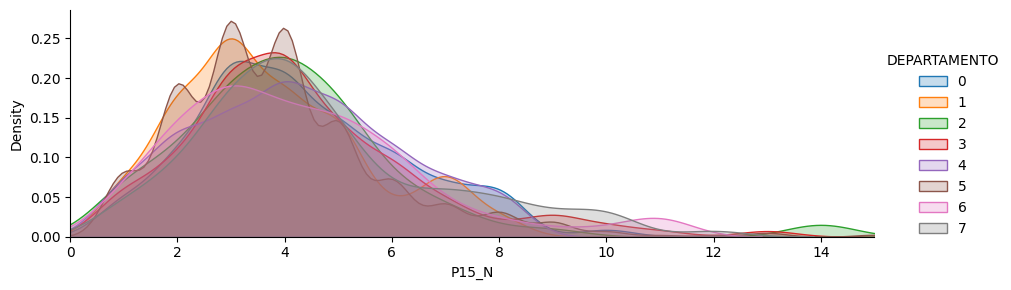

In [51]:
facet = sns.FacetGrid(data, hue="DEPARTAMENTO",aspect=3)
facet.map(sns.kdeplot,"P15_N",shade= True)
facet.set(xlim=(0, data["P15_N"].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='THOGAR', ylabel='P15_N'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 96.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


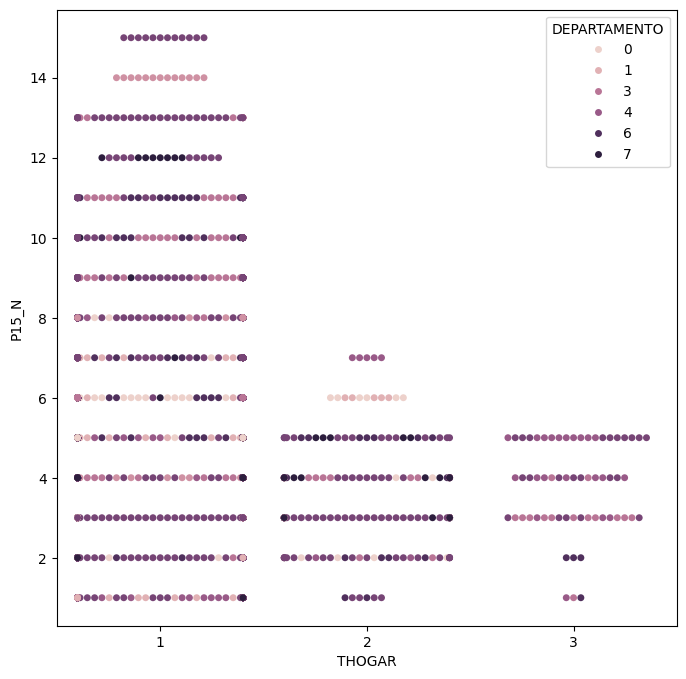

In [56]:
plt.figure(figsize=(8,8))
sns.swarmplot(x= "THOGAR",y="P15_N",data=data,hue="DEPARTAMENTO")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

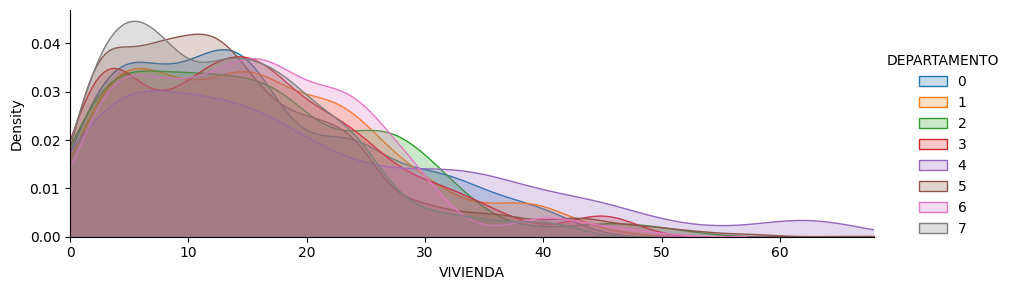

In [59]:
facet = sns.FacetGrid(data, hue="DEPARTAMENTO",aspect=3)
facet.map(sns.kdeplot,"VIVIENDA",shade= True)
facet.set(xlim=(0, data["VIVIENDA"].max()))
facet.add_legend()

plt.show()

<Axes: xlabel='CIUDAD', ylabel='ESTRATO'>

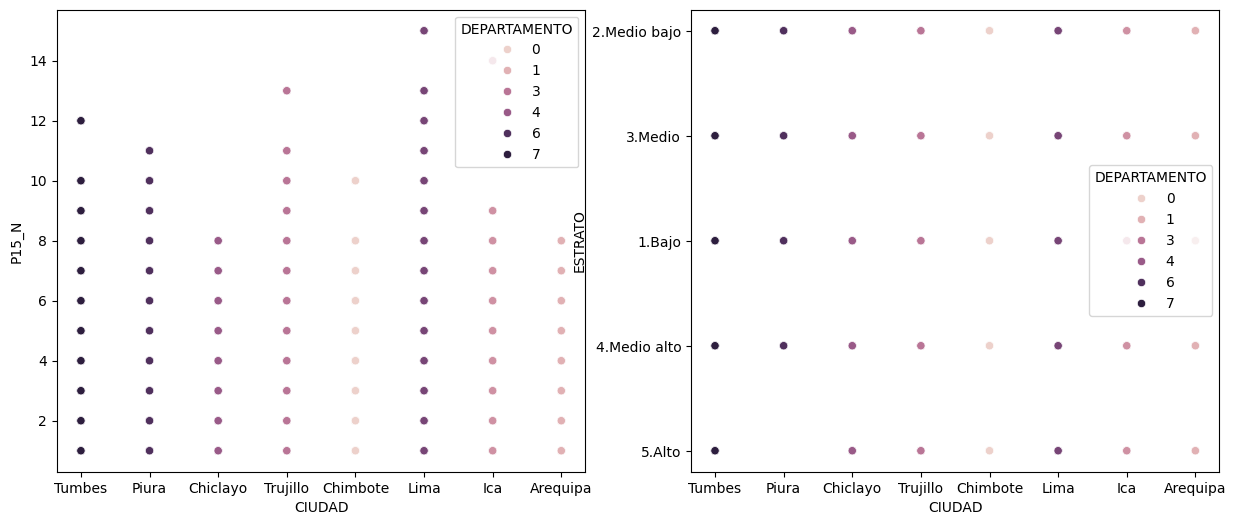

In [62]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "CIUDAD", y = "P15_N", data = data, hue="DEPARTAMENTO", ax = ax[0])
sns.scatterplot(x = "CIUDAD", y = "ESTRATO", data = data, hue="DEPARTAMENTO", ax = ax[1])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

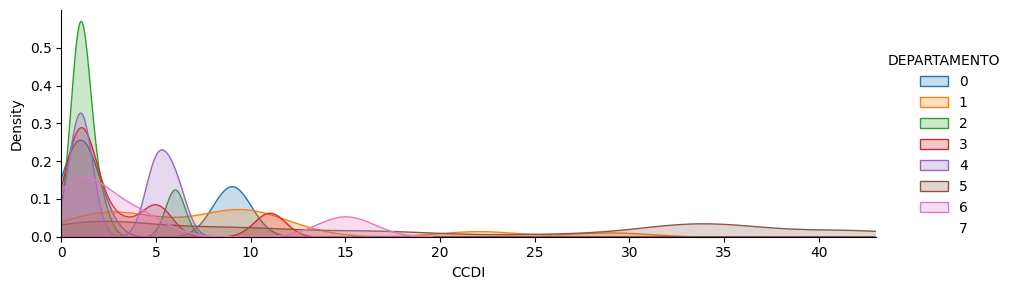

In [68]:
facet = sns.FacetGrid(data, hue="DEPARTAMENTO",aspect=3)
facet.map(sns.kdeplot,"CCDI",shade= True)
facet.set(xlim=(0, data["CCDI"].max()))
facet.add_legend()

plt.show()

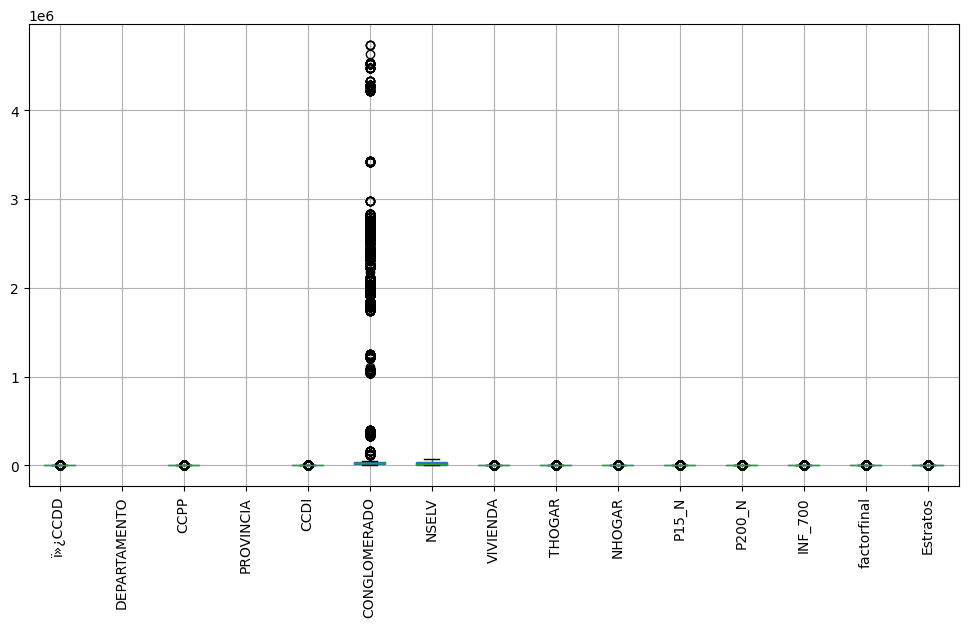

In [81]:
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)
plt.show()

<ipython-input-73-b9956b4adea7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])
<ipython-input-73-b9956b4adea7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])
<ipython-input-73-b9956b4adea7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])
<ipython-input-73-b9956b4adea7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

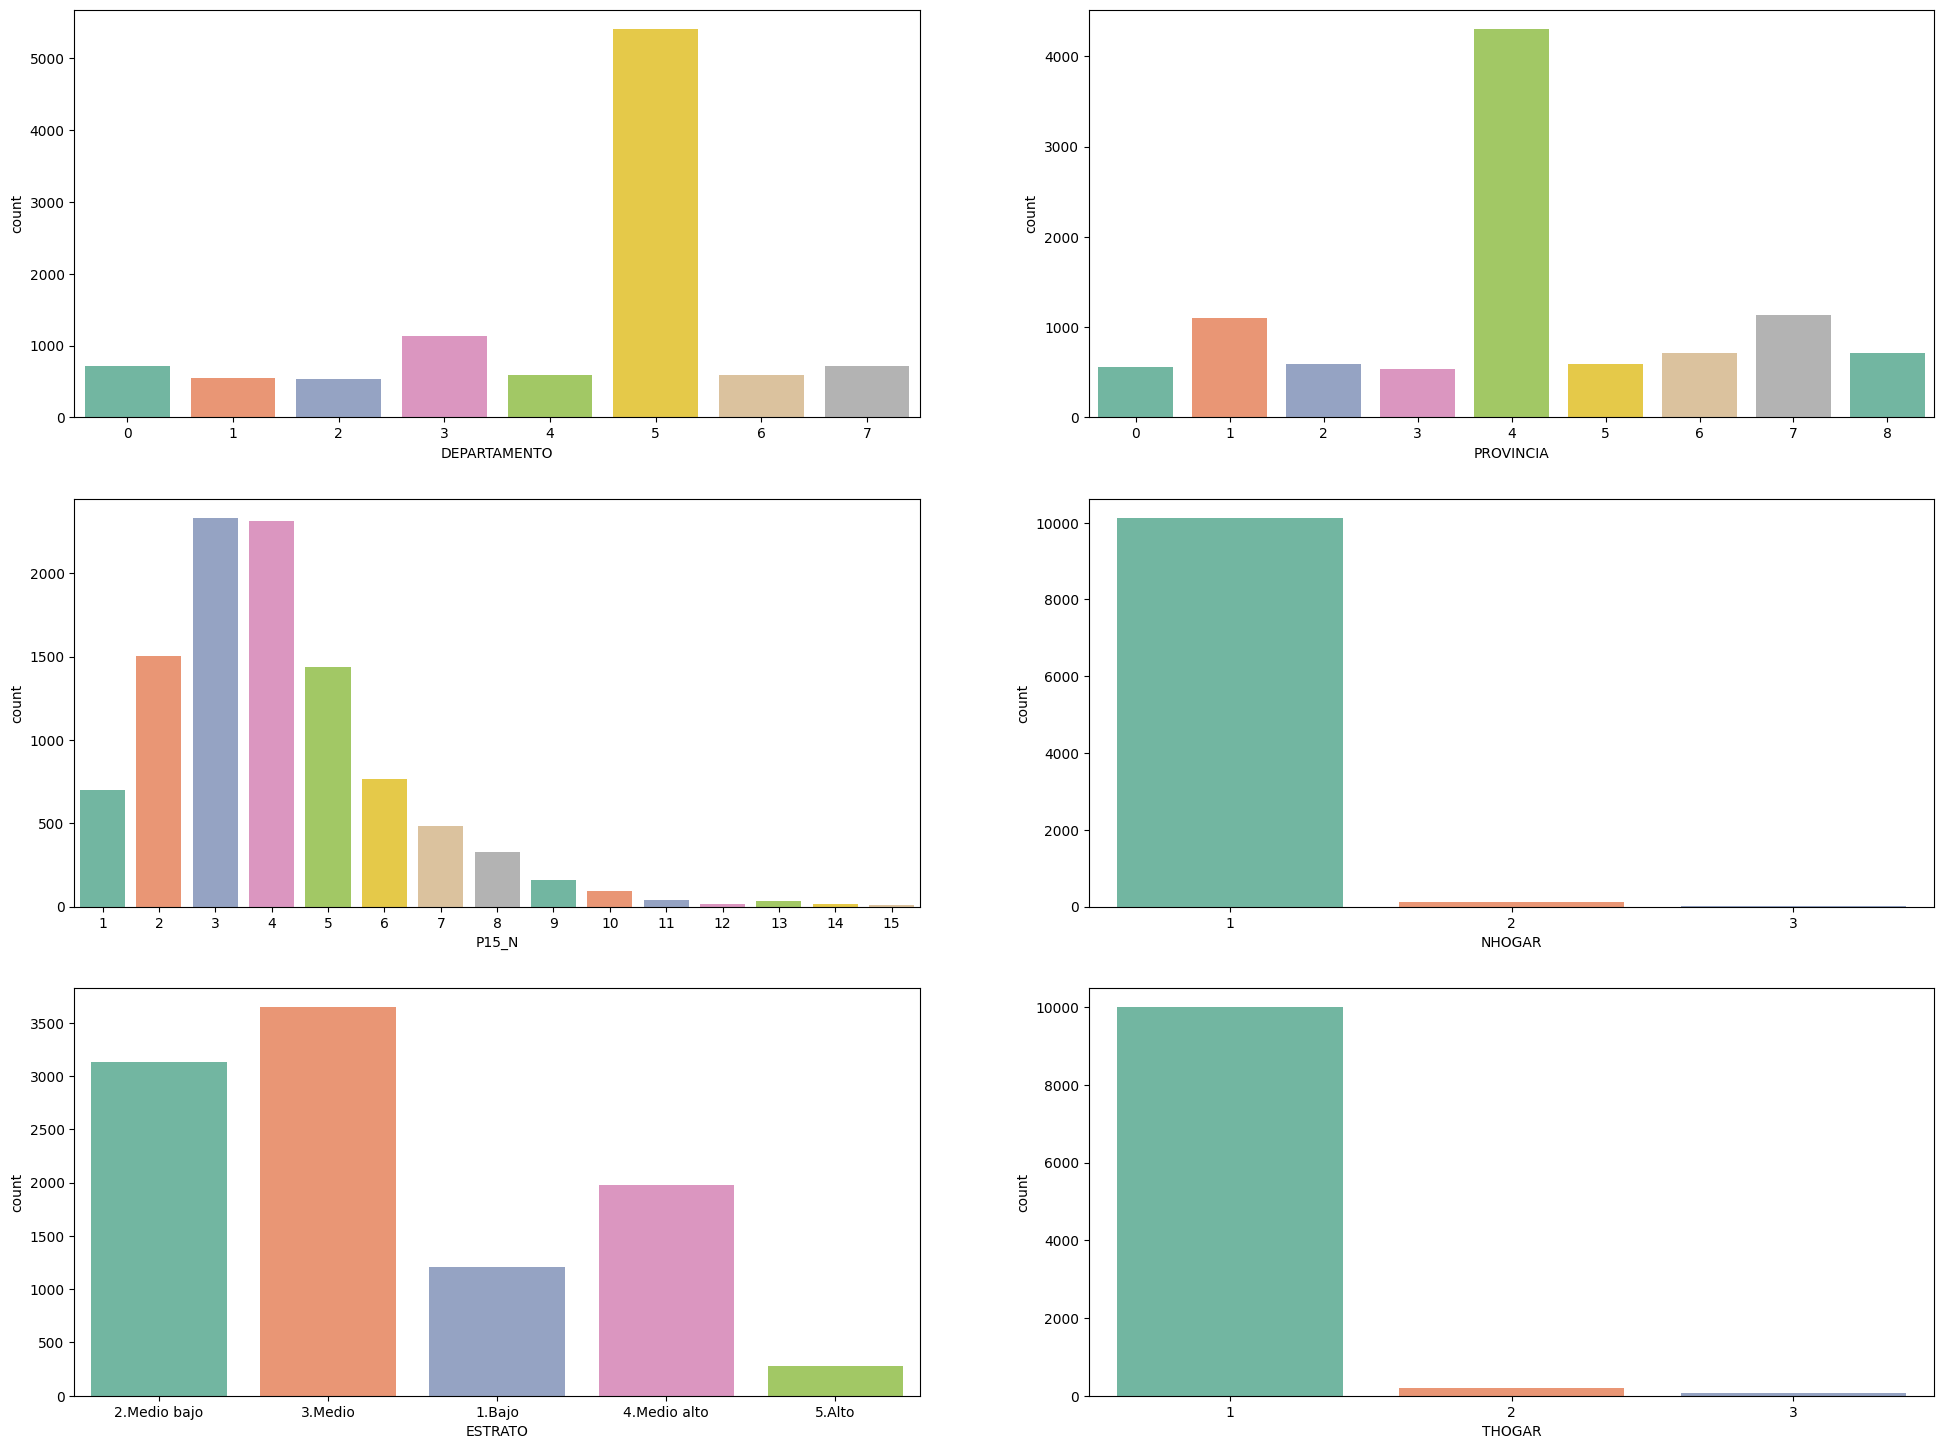

In [73]:
fig, axes = plt.subplots(3, 2, figsize=(24,18))
axes = axes.flatten()
features = ["DEPARTAMENTO","PROVINCIA","P15_N","NHOGAR","ESTRATO","THOGAR"]
for i in range(len(features)):
    sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])

plt.show()

Está claro que las columnas RowNumber, CustomerId y Surname no tienen ningún poder predictivo, ya que son solo información general sobre un determinado cliente y, para eso, tendría sentido eliminarlas usando el método drop en pandas DataFrames. Observe que vamos a establecer el argumento inplace en True para aplicar las modificaciones a los datos actuales.

In [75]:
map_prov ={"Lima":0,"Trujillo":1,"Callao":2,"Santa":3,"Tumbes":4,"Piura":5,"Chiclayo":6,"Arequipa":7,"Ica":8}
map_estr ={"Bajo":1,"Medio bajo":2,"Medio":3,"Medio alto":4,"Alto":5}
data["PROVINCIA"]=data["PROVINCIA"].map(map_prov)
data["DEPARTAMENTO"]=data["DEPARTAMENTO"].map(map_estr)
data.head()

,ï»¿CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P709_5,P709_6,P709_7,P709_8,P709_9,P709_10,P709_11,P709_12,factorfinal,Estratos
0,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,9.ReunificaciÃ³n familiar,10.Esparcimiento y diversiÃ³n,0,0,9.211079,1
1,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,9.ReunificaciÃ³n familiar,0,0,0,9.211079,1
2,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,6.ArtÃ­culos no alimentarios (ropa/cuidado per...,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,9.211079,1
3,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,0,0,0,12.SUS NECESIDADES YA ESTÃN CUBIERTAS,9.211079,1
4,24,NaN,1,NaN,1,TUMBES,Tumbes,36,200,25,...,0,0,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,18.422158,1


In [80]:
data.loc[ data['P15_N'] <= 5, 'P15_N'] = 0
data.loc[(data['P15_N'] > 7) & (data['P15_N'] <= 5), 'P15_N'] = 1
data.loc[(data['P15_N'] > 10) & (data['P15_N'] <= 7), 'P15_N'] = 2
data.loc[ data['P15_N'] > 10, 'P15_N'] = 3
data["P15_N"]=data["P15_N"].astype(int)
data.head()

,ï»¿CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P709_5,P709_6,P709_7,P709_8,P709_9,P709_10,P709_11,P709_12,factorfinal,Estratos
0,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,9.ReunificaciÃ³n familiar,10.Esparcimiento y diversiÃ³n,0,0,9.211079,1
1,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,9.ReunificaciÃ³n familiar,0,0,0,9.211079,1
2,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,6.ArtÃ­culos no alimentarios (ropa/cuidado per...,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,9.211079,1
3,24,NaN,1,NaN,1,TUMBES,Tumbes,34,240,21,...,0,0,0,0,0,0,0,12.SUS NECESIDADES YA ESTÃN CUBIERTAS,9.211079,1
4,24,NaN,1,NaN,1,TUMBES,Tumbes,36,200,25,...,0,0,0,0,0,10.Esparcimiento y diversiÃ³n,0,0,18.422158,1


<ipython-input-87-cbb52c9f8b16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="P15_N",data=data, palette="Set2")


<Axes: xlabel='P15_N', ylabel='count'>

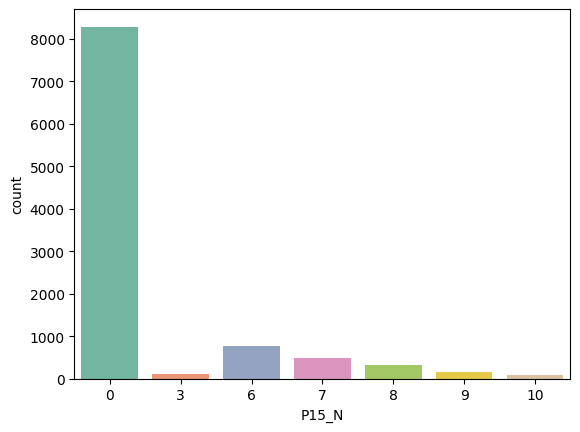

In [87]:
sns.countplot(x="P15_N",data=data, palette="Set2")

3. Feature Engineering